In [ ]:
!git clone https://github.com/ultralytics/yolov5  
%cd yolov5
%pip install -qr requirements.txt

import torch
import utils
display = utils.notebook_init()  

YOLOv5 🚀 v6.2-239-gf33718f Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 22.6/78.2 GB disk)


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


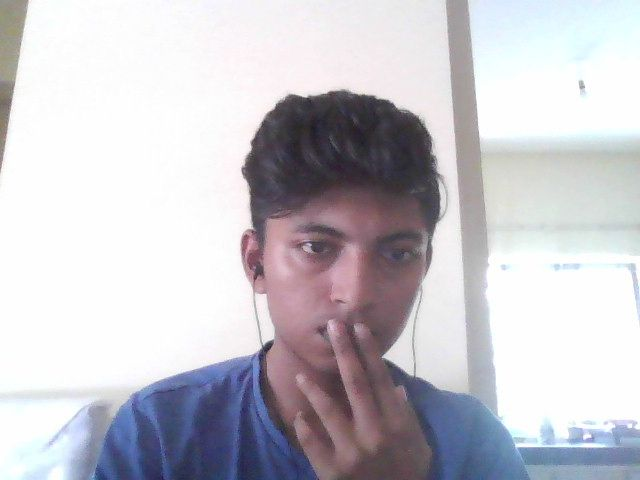

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
!unzip -q /content/train_data.zip -d  ../

In [ ]:
!rm -rf /content/datasets

In [ ]:
!python train.py --img 44 --batch 4 --epochs 50 --data custom_data.yaml --weights yolov5s.pt --save 2 --cache

train: weights=yolov5s.pt, cfg=, data=custom_data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=4, imgsz=44, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=2, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-239-gf33718f Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4,

In [ ]:
!python detect.py --weights runs/train/exp/weights/last.pt --img 640 --conf 0.25 --source 0


detect: weights=['runs/train/exp/weights/last.pt'], source=0, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-239-gf33718f Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

[ WARN:0@5.643] global /io/opencv/modules/videoio/src/cap_v4l.cpp (902) open VIDEOIO(V4L2:/dev/video0): can't open camera by index
Traceback (most recent call last):
  File "detect.py", line 258, in <module>
    main(opt)
  File "detect.py", line 253, in main
    run(**vars(opt))
  File "/

In [ ]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source ../photo.jpg

detect: weights=['runs/train/exp2/weights/last.pt'], source=0, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-231-g0039870 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

[ WARN:0@5.252] global /io/opencv/modules/videoio/src/cap_v4l.cpp (902) open VIDEOIO(V4L2:/dev/video0): can't open camera by index
Traceback (most recent call last):
  File "detect.py", line 258, in <module>
    main(opt)
  File "detect.py", line 253, in main
    run(**vars(opt))
  File "